In [23]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
loan_df = pd.read_csv("C:\\Users\\Daniel-Panovest\\Downloads\\python ultra\\files\\data\\vehicle_loans_clean.csv", index_col="UNIQUEID")

In [25]:
#viewing the cleaned dataframe's info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   EMPLOYMENT_TYPE                      233154 non-null  object 
 8   STATE_ID                             233154 non-null  int64  
 9   EMPLOYEE_CODE_ID                     233154 non-null  int64  
 10  MOBILENO_AVL_FLAG                    233154 non-null  int64  
 11  AADHAR_F

In [26]:
#exploratory data analysis to identify columns with no predictive value based on unique values
loan_df.nunique()

DISBURSED_AMOUNT                       24565
ASSET_COST                             46252
LTV                                     6579
BRANCH_ID                                 82
SUPPLIER_ID                             2953
MANUFACTURER_ID                           11
CURRENT_PINCODE_ID                      6698
EMPLOYMENT_TYPE                            3
STATE_ID                                  22
EMPLOYEE_CODE_ID                        3270
MOBILENO_AVL_FLAG                          1
AADHAR_FLAG                                2
PAN_FLAG                                   2
VOTERID_FLAG                               2
DRIVING_FLAG                               2
PASSPORT_FLAG                              2
PERFORM_CNS_SCORE                        573
PERFORM_CNS_SCORE_DESCRIPTION             20
PRI_NO_OF_ACCTS                          108
PRI_ACTIVE_ACCTS                          40
PRI_OVERDUE_ACCTS                         22
PRI_CURRENT_BALANCE                    71341
PRI_SANCTI

In [27]:
#every row in mobileno_avl_flag has one unique value (number 1). hence, no predictive value
loan_df = loan_df.drop(["MOBILENO_AVL_FLAG"], axis=1)

In [28]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   EMPLOYMENT_TYPE                      233154 non-null  object 
 8   STATE_ID                             233154 non-null  int64  
 9   EMPLOYEE_CODE_ID                     233154 non-null  int64  
 10  AADHAR_FLAG                          233154 non-null  int64  
 11  PAN_FLAG

In [29]:
#droping some id columns because although categorical, they are unordered and can introduce complexity into our model
loan_df = loan_df.drop(["SUPPLIER_ID", "CURRENT_PINCODE_ID", "EMPLOYEE_CODE_ID", "BRANCH_ID"], axis=1)

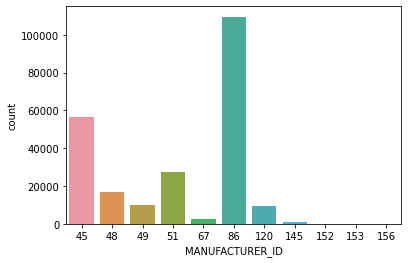

In [45]:
#viewing total car loans taken up by each car manufacturer 
sns.countplot(x="MANUFACTURER_ID", data=loan_df);

In [31]:
#viewing the percentage of total car loans taken up by each car manufacturer. to answers questions on whether manufacturer 156 is very expensive and has zero % of the total loans 
print(loan_df.MANUFACTURER_ID.value_counts(normalize=True))

86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64


In [32]:
#grouping loan default percentage by manufacturer ID. pivoting our otput on the loan default column using unstack
loan_df.groupby("MANUFACTURER_ID")["LOAN_DEFAULT"].value_counts(normalize=True).unstack(level=-1)

LOAN_DEFAULT,0,1
MANUFACTURER_ID,,
45,0.771501,0.228499
48,0.727469,0.272531
49,0.781213,0.218787
51,0.792053,0.207947
67,0.782536,0.217464
86,0.795406,0.204594
120,0.779250,0.220750
145,0.799486,0.200514
152,1.000000,NaN


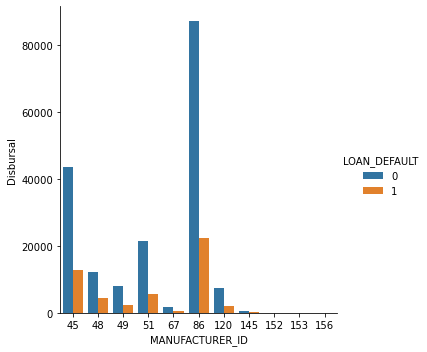

In [33]:
#sorting the frequency of loan default by manufacturer ID
sns.catplot(x="MANUFACTURER_ID", kind="count", hue="LOAN_DEFAULT", data=loan_df)
plt.ylabel("Disbursal")
plt.show();

In [34]:
#creating a function from previous exploratory data analysis processes for other categorical columns

def eda_cat(col_name: str):
    print(f'{col_name} summary')
    print("\n")

    print(f'{col_name} value counts')
    print(loan_df[col_name].value_counts())
    print("\n")

    print(f'Grouping {col_name} by percentage of loan default')
    print(loan_df.groupby(col_name)["LOAN_DEFAULT"].value_counts(normalize=True).unstack(level=-1))
    print("\n")

    print(f'catplot of {col_name}')
    sns.catplot(x=col_name, kind="count", hue="LOAN_DEFAULT", data=loan_df);
    plt.ylabel("Disbursal")
    plt.show()

DISBURSAL_MONTH summary


DISBURSAL_MONTH value counts
10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64


Grouping DISBURSAL_MONTH by percentage of loan default
LOAN_DEFAULT            0         1
DISBURSAL_MONTH                    
1                0.770492  0.229508
2                0.920000  0.080000
3                0.795260  0.204740
4                0.785822  0.214178
5                0.788581  0.211419
6                0.784009  0.215991
7                0.776386  0.223614
8                0.788732  0.211268
9                0.806532  0.193468
10               0.759635  0.240365
11               0.817409  0.182591
12               0.796366  0.203634


catplot of DISBURSAL_MONTH


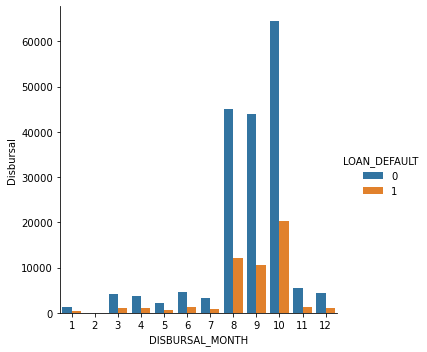

In [35]:
#running exploratory data analysis function on categorical data
eda_cat("DISBURSAL_MONTH")

count    233154.000000
mean         33.902871
std           9.829475
min          17.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: AGE, dtype: float64


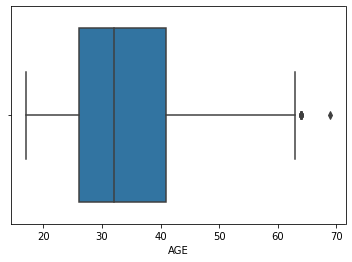

In [36]:
#generating summary statistics of continuous variables using describe method
print(loan_df.AGE.describe())

#visualing descriptive statistics with box plot
sns.boxplot(x="AGE", data=loan_df);

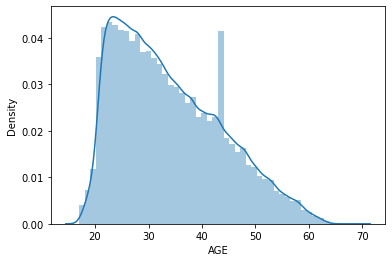

In [43]:
#using distplot to better visualize the frequency of age distribution
sns.distplot(loan_df.AGE, hist=True);
plt.show()

                 count       mean       std   min   25%   50%   75%   max
LOAN_DEFAULT                                                             
0             182543.0  34.090713  9.860825  17.0  26.0  32.0  41.0  69.0
1              50611.0  33.225366  9.685441  17.0  25.0  31.0  40.0  64.0


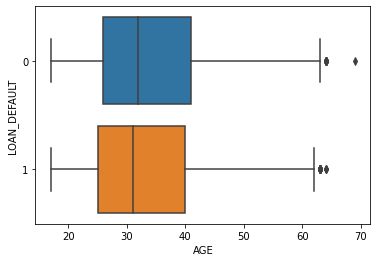

In [38]:
#viewing summary stats of defaulter/non-defaulter's age grouped by the target variable 
print(loan_df.groupby("LOAN_DEFAULT")["AGE"].describe())

#viewing summary stats of defaulter/non-defaulter's age grouped by the target variable
sns.boxplot(x="AGE", y="LOAN_DEFAULT", data=loan_df, orient="h");

In [50]:
#creating a function to explore continuous variables
def eda_con(*col_name):
    for col in col_name:
        print(f'summary statistics of {col}')
        print(loan_df[col].describe())
        print("\n")

        print(f'boxplot to visualize summary statistics of {col}')
        sns.boxplot(x=col, data=loan_df);
        plt.show()
        print("\n")

        print(f'displot to further visualize frequency of {col}')
        sns.distplot(loan_df[col], hist=True);
        plt.show()
        print("\n")

        print(f'summary statistics of grouping {col} by the target variable')
        print(loan_df.groupby("LOAN_DEFAULT")[col].describe())
        print("\n")

        print(f'boxplot to visualize summary stats of {col} grouped by the target variable')
        sns.boxplot(x=col, y="LOAN_DEFAULT", data=loan_df, orient="h");
        plt.show()
        print("\n")

summary statistics of DISBURSED_AMOUNT
count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


boxplot to visualize summary statistics of DISBURSED_AMOUNT


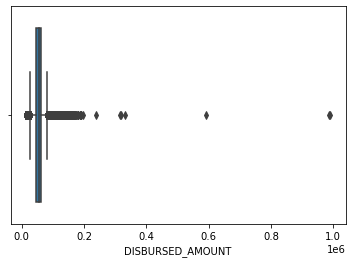



displot to further visualize frequency of DISBURSED_AMOUNT


c:\Users\Daniel-Panovest\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


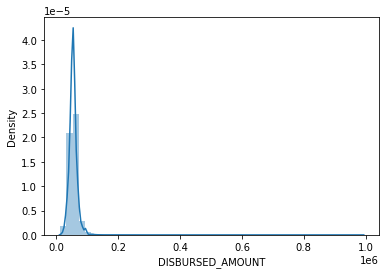



summary statistics of grouping DISBURSED_AMOUNT by the target variable
                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


boxplot to visualize summary stats of DISBURSED_AMOUNT grouped by the target variable


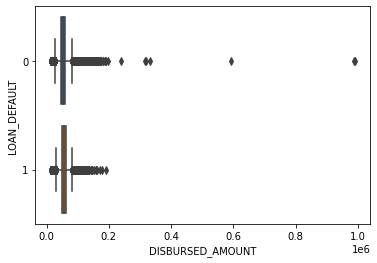

In [51]:
eda_con("DISBURSED_AMOUNT")

In [56]:
loan_df.to_csv('C:\\Users\\Daniel-Panovest\\Downloads\\python ultra\\files\\data\\vehicle_loans_eda.csv')